# Google Drive のマウント

In [ ]:
from google.colab import drive
from pathlib import Path

drive.mount("/drive")
drive_dir = Path("/drive")

# 必要なパッケージのインストール

リポジトリのルートディレクトリを指定してください。

In [ ]:
root_dir = drive_dir / "MyDrive/Colab Notebooks/book-llm-from-scratch-main"

In [ ]:
%cd {root_dir.resolve().as_posix()}
%pip install .

# 2.2.2

In [ ]:
import numpy as np


def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=-1, keepdims=True)


def attention(Q, K, V):
    attention_weights = softmax(np.matmul(Q, K.T))
    return np.matmul(attention_weights, V), attention_weights

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib


def plot_vectors(vectors, texts, ax, arrow_args={}, text_args={}):
    for i, (x, y) in enumerate(vectors):
        ax.annotate("", xy=[x, y], xytext=[0, 0], arrowprops=arrow_args)
        ax.text(x * 1.1, y * 1.1, texts[i], **text_args)


def plot_attention_hist(attention_weights, ax):
    ax.bar(range(len(attention_weights)), attention_weights)
    ax.set_xticks(range(len(attention_weights)))
    ax.set_xticklabels([f"$v_{i+1}$" for i in range(len(attention_weights))])
    ax.set_ylabel("注意度")

In [ ]:
import math

n = 10
vectors = []
# 360°をn等分した角度
theta = 2 * math.pi / n
for i in range(n):
    x = math.cos(theta * i)
    y = math.sin(theta * i)
    vectors.append([x, y])

vectors = np.array(vectors)
query = np.array([1 / math.sqrt(2), 1 / math.sqrt(2)])
output, attention_weights = attention(query, vectors, vectors)
print("出力ベクトル:", output)
print("注意度の形:", attention_weights.shape)
print("注意度の和:", attention_weights.sum())

In [ ]:
# vectors と query をプロット
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
texts = [f"$v_{{{i+1}}}$" for i in range(n)]
arrow_args1 = dict(
    width=1, headwidth=8, headlength=10, facecolor="gray", edgecolor="gray"
)
text_args1 = dict(ha="center", va="center")
plot_vectors(
    vectors,
    texts,
    ax,
    arrow_args=arrow_args1,
    text_args=text_args1,
)
arrow_args2 = dict(
    width=1, headwidth=8, headlength=10, facecolor="red", edgecolor="red"
)
text_args2 = dict(ha="center", va="center", color="red")
plot_vectors([query], ["query"], ax, arrow_args=arrow_args2, text_args=text_args2)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

fig.savefig("vectors_and_query.png", dpi=144)
plt.show()

In [ ]:
# attention weights をプロット
def plot_attention_weights(vectors, query, output, attention_weights, ax):
    texts = [f"{a:.3f}" for a in attention_weights]

    arrow_args1 = dict(
        width=1, headwidth=8, headlength=10, facecolor="gray", edgecolor="gray"
    )
    text_args1 = dict(ha="center", va="center")
    plot_vectors(
        vectors,
        texts,
        ax,
        arrow_args=arrow_args1,
        text_args=text_args1,
    )
    arrow_args2 = dict(
        width=1, headwidth=8, headlength=10, facecolor="red", edgecolor="red"
    )
    text_args2 = dict(ha="center", va="center", color="red")
    plot_vectors([query], ["query"], ax, arrow_args=arrow_args2, text_args=text_args2)

    arrow_args3 = dict(
        width=1, headwidth=8, headlength=10, facecolor="blue", edgecolor="blue"
    )
    text_args3 = dict(ha="center", va="center", color="blue")
    plot_vectors([output], ["output"], ax, arrow_args=arrow_args3, text_args=text_args3)


fig, ax = plt.subplots(figsize=(5, 5))
plot_attention_weights(vectors, query, output, attention_weights, ax)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

fig.savefig("attention_weights.png", dpi=144)
plt.show()

In [ ]:
# 1つだけ長いベクトルがある場合の実験

vectors2 = vectors.copy()
vectors2[3] = vectors2[3] * 5

_, attention_weights2 = attention(query, vectors2, vectors2)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_attention_hist(attention_weights, ax)
ax.set_ylim(0, 0.5)
fig.savefig("attention_weights_hist1.png", dpi=144)
plt.show()
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_ylim(0, 0.5)
plot_attention_hist(attention_weights2, ax)
fig.savefig("attention_weights_hist2.png", dpi=144)
plt.show()

In [ ]:
queries = np.array([[1 / math.sqrt(2), 1 / math.sqrt(2)], [1, 0], [0, 1]])

output, attention_weights = attention(queries, vectors, vectors)
print("出力の形:", output.shape)
print("注意度行列の形:", attention_weights.shape)
print("注意度の行ごとの和:", attention_weights.sum(axis=1))

# 2.2.3

In [ ]:
import numpy as np


def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=-1, keepdims=True)


def attention(Q, K, V):
    attention_weights = softmax(np.matmul(Q, K.T))
    return np.matmul(attention_weights, V), attention_weights

In [ ]:
x1 = np.random.randn(100) * 10
x2 = np.random.randn(100)

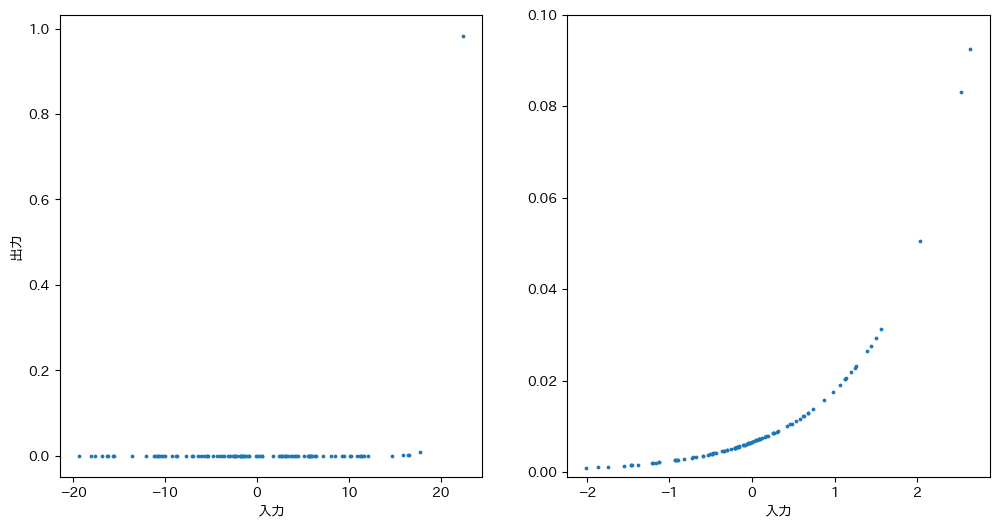

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(x1, softmax(x1), s=3)
ax2.scatter(x2, softmax(x2), s=3)
# ax1.set_ylim(-0.001, 0.1)
ax2.set_ylim(-0.001, 0.1)
ax1.set_xlabel("入力")
ax2.set_xlabel("入力")
ax1.set_ylabel("出力")

fig.savefig("softmax_different_ranges.png", dpi=144)

In [ ]:
dim1 = 1
dim2 = 100
n_keys = 20

q1 = np.random.randn(dim1)
q2 = np.random.randn(dim2)
k1 = np.random.randn(n_keys, dim1)
k2 = np.random.randn(n_keys, dim2)

In [ ]:
dot1 = np.matmul(k1, q1)
s1_1 = softmax(dot1)
s1_2 = softmax(dot1 / np.sqrt(dim1))

dot2 = np.matmul(k2, q2)
s2_1 = softmax(dot2)
s2_2 = softmax(dot2 / np.sqrt(dim2))

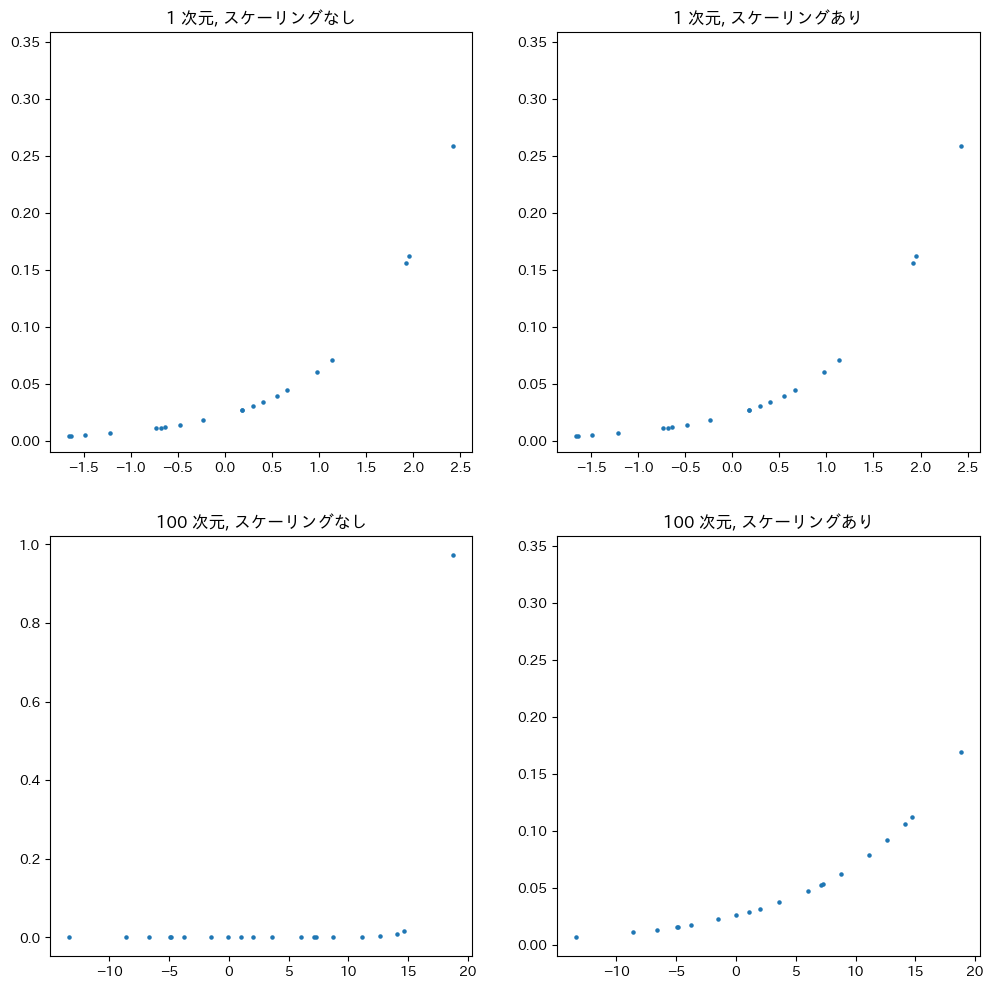

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

max_1_2 = max(np.max(s1_2), np.max(s2_2))
ax[0, 0].scatter(dot1, s1_1, s=5)
ax[0, 0].set_title(f"{dim1} 次元, スケーリングなし")
ax[0, 0].set_ylim(-0.01, max_1_2 + 0.1)
ax[0, 1].scatter(dot1, s1_2, s=5)
ax[0, 1].set_title(f"{dim1} 次元, スケーリングあり")
ax[0, 1].set_ylim(-0.01, max_1_2 + 0.1)
ax[1, 0].scatter(dot2, s2_1, s=5)
ax[1, 0].set_title(f"{dim2} 次元, スケーリングなし")
ax[1, 1].scatter(dot2, s2_2, s=5)
ax[1, 1].set_title(f"{dim2} 次元, スケーリングあり")
ax[1, 1].set_ylim(-0.01, max_1_2 + 0.1)

fig.savefig("softmax_scaling.png", dpi=144)

In [ ]:
def scaled_attention(Q, K, V):
    dim = Q.shape[-1]
    attention_weights = softmax(np.matmul(Q, K.T) / np.sqrt(dim))
    return np.matmul(attention_weights, V), attention_weights